In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
from io import BytesIO

# Load the data from CSV
team_activity_file_path = 'data/internal_data.csv'
df = pd.read_csv(team_activity_file_path, index_col=0).transpose()


In [59]:
# Define the mapping from qualitative descriptions to numerical values
involvement_mapping = {
    'Strong': 3,
    'Good': 2,
    'Average': 1,
    'None': 0
}
internal_columns = ['Funding', 'Application-Oriented', 'Demos', 'Industrial Collaborations', 'System Maturity', 'Number of Members', 'Academic Collaborations']

industry_columns = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                                'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML', ]

# Convert qualitative descriptions to numerical values
for column in internal_columns:
    if column in df.columns:
        df[column] = df[column].map(involvement_mapping).fillna(0)


In [108]:
df

,Funding,Application-Oriented,Number of Members,Academic Collaborations,System Maturity,Demos,Industrial Collaborations
DICE,1.0,2.0,1,2.0,2.0,2.0,1.0
MagICL,3.0,3.0,3,3.0,3.0,3.0,3.0
BioHIT,3.0,3.0,2,2.0,2.0,2.0,1.0
CAKT,3.0,3.0,2,3.0,3.0,3.0,3.0
CER,2.0,2.0,3,0.0,3.0,3.0,0.0
DIA,0.0,3.0,1,3.0,3.0,2.0,2.0
KMU,0.0,3.0,3,1.0,2.0,2.0,2.0
RoboSKEL,0.0,2.0,1,1.0,2.0,2.0,1.0
AI Politeia,3.0,1.0,1,3.0,2.0,2.0,0.0
ARTIFACT,1.0,3.0,2,1.0,1.0,1.0,1.0


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


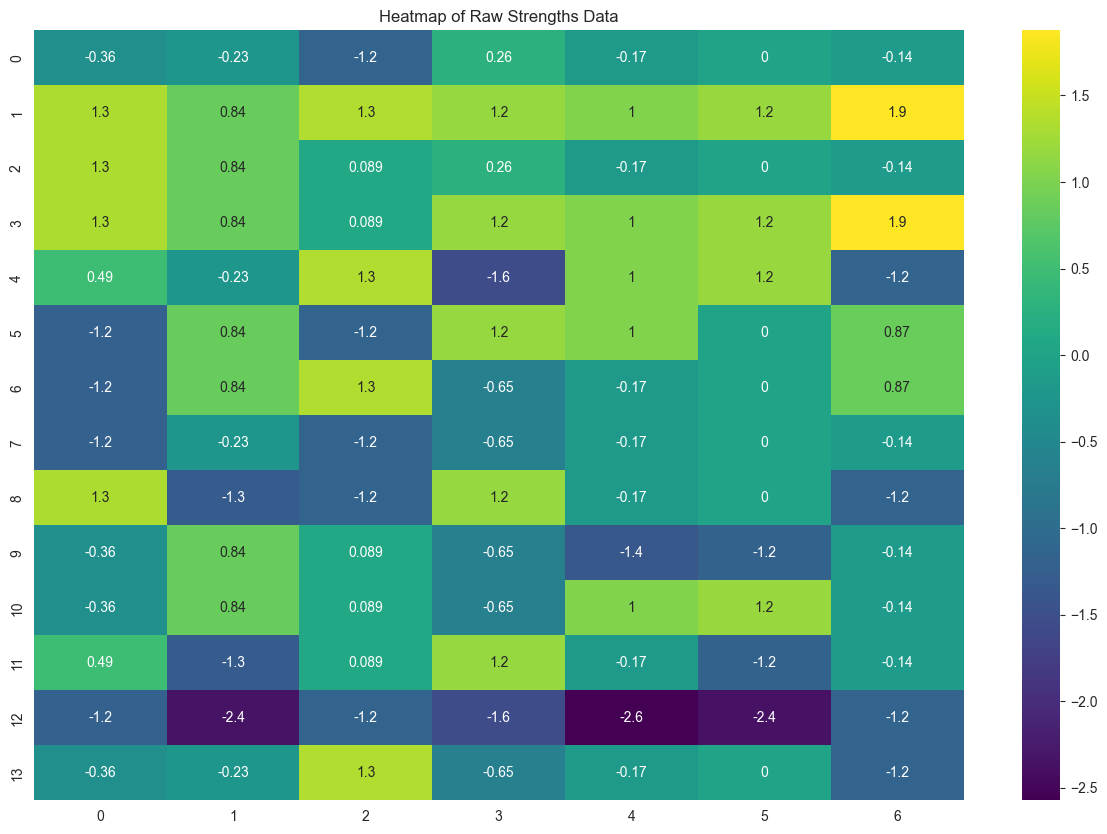

In [54]:
df_scaled = scaler.fit_transform(df)
plt.figure(figsize=(15, 10))
sns.heatmap(df_scaled, annot=True, cmap='viridis')
plt.title('Heatmap of Raw Strengths Data')
plt.show()

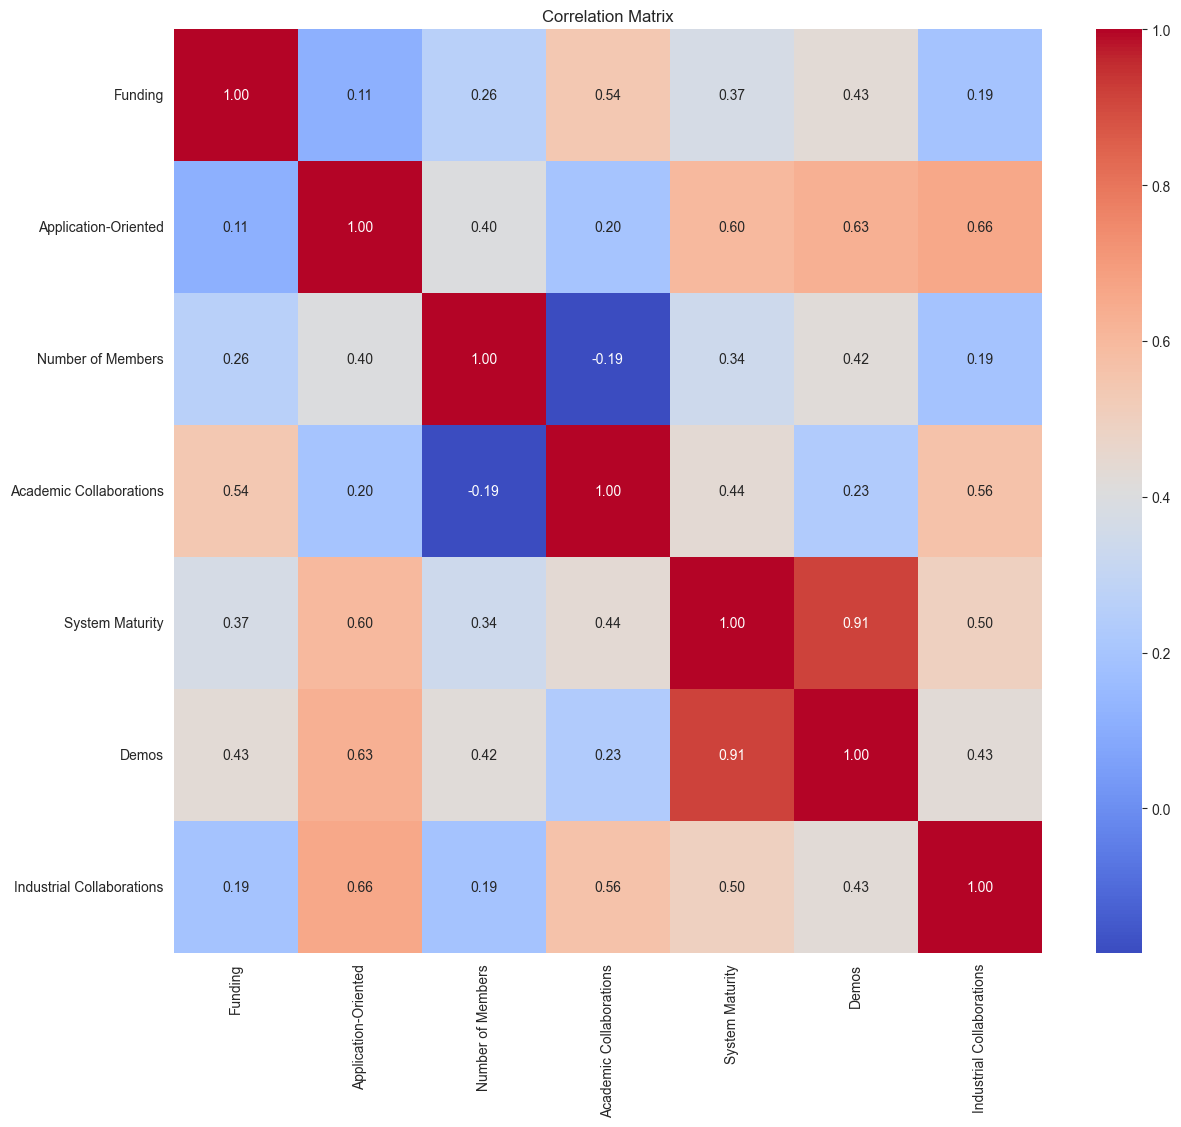

In [7]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [51]:
"""
    Applies Factor Analysis to the scaled data to reduce its dimensionality.

    Factor Analysis is a statistical method used to describe variability among observed,
    correlated variables in terms of potentially lower unobserved variables called factors.

    Parameters:
    - X_scaled (ndarray): The scaled data matrix (e.g., result of StandardScaler).
    - n_components (int): Number of factors to extract. Default is 2.
    - random_state (int): Seed used by the random number generator. Default is 42.

    Returns:
    - fa_results (ndarray): The transformed data matrix with reduced dimensions.
    - fa (FactorAnalysis object): The fitted FactorAnalysis model.
    """

# Apply Factor Analysis
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_results = fa.fit_transform(X_scaled)

In [56]:
# Create a DataFrame with the Factor Analysis results
fa_df = pd.DataFrame(data=fa_results, columns=['Factor1', 'Factor2'])
fa_df['Team'] = df.index

In [57]:
# Display the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=df.columns, columns=['Factor1', 'Factor2'])
print(factor_loadings)

                            Factor1   Factor2
Funding                   -0.546355 -0.248861
Application-Oriented      -0.612192  0.204794
Number of Members         -0.288099  0.442011
Academic Collaborations   -0.591636 -0.785128
System Maturity           -0.938720  0.156669
Demos                     -0.906122  0.387385
Industrial Collaborations -0.590910 -0.263268


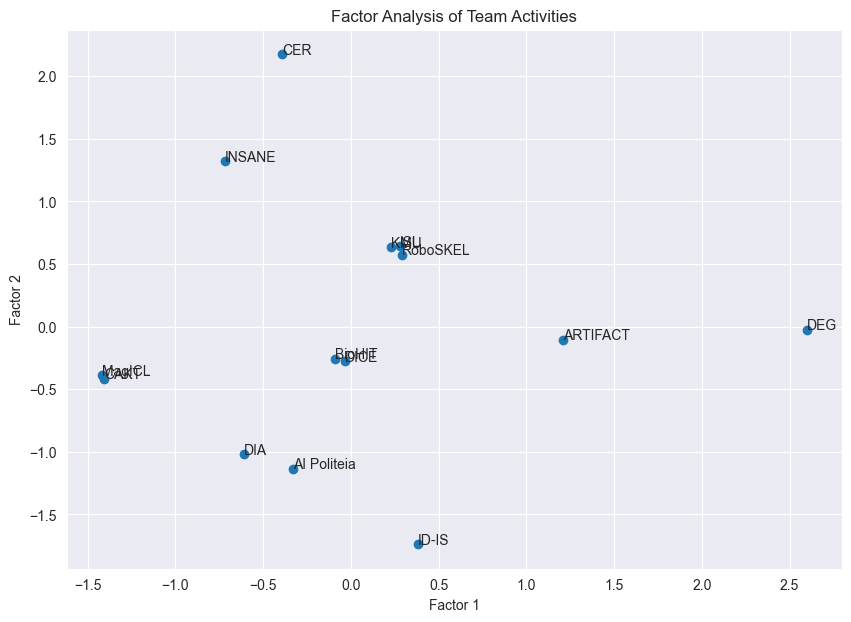

In [58]:
# Plot Factor Analysis results
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(fa_df['Factor1'], fa_df['Factor2'])
for i, txt in enumerate(fa_df['Team']):
    plt.annotate(txt, (fa_df['Factor1'][i], fa_df['Factor2'][i]))
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis of Team Activities')
plt.show()

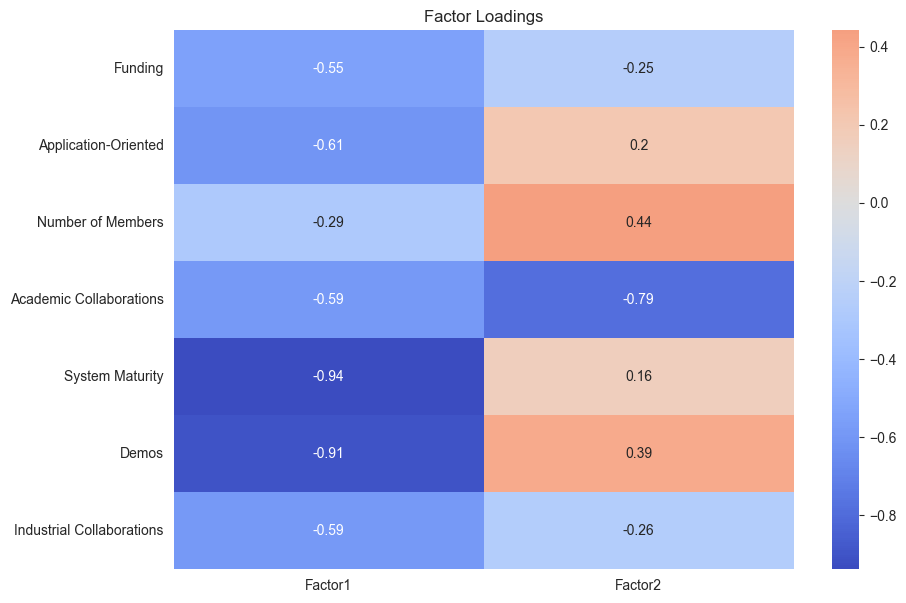

In [59]:
import seaborn as sns

# Plot the factor loadings
plt.figure(figsize=(10, 7))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings')
plt.show()


In [61]:
feature_weights = {
    'Demos': 1,
    'Industrial Collaborations': 1,
    'Academic Collaborations': 1,
    'Application-Oriented': 1,
    'System Maturity': 1,
    'Funding': 1,
    'Number of Members': 1,
}

In [62]:
# Calculate performance scores based on the mapping and weights
def calculate_performance_score(row, weights):
    
    """
    Calculate a performance score for a given row based on the feature values and their corresponding weights.

    Parameters:
    - row (Series): A row of data from the DataFrame.
    - weights (dict): A dictionary where keys are feature names and values are the weights for those features.

    Returns:
    - score (int): The calculated performance score for the row.
    """
    score = 0
    for feature, weight in weights.items():
        if feature in row:
            score += row[feature] * weight
    return score

df['Performance Score'] = df.apply(calculate_performance_score, axis=1, weights=feature_weights)

# Reset index to have 'Team' as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Team'}, inplace=True)

# Display the updated DataFrame
print(df.head())

     Team  Funding  Application-Oriented  Number of Members  \
0    DICE      1.0                   2.0                  1   
1  MagICL      3.0                   3.0                  3   
2  BioHIT      3.0                   3.0                  2   
3    CAKT      3.0                   3.0                  2   
4     CER      2.0                   2.0                  3   

   Academic Collaborations  System Maturity  Demos  Industrial Collaborations  \
0                      2.0              2.0    2.0                        1.0   
1                      3.0              3.0    3.0                        3.0   
2                      2.0              2.0    2.0                        1.0   
3                      3.0              3.0    3.0                        3.0   
4                      0.0              3.0    3.0                        0.0   

   Performance Score  
0               11.0  
1               21.0  
2               15.0  
3               20.0  
4               13.

In [63]:
# Visualize individual team performance
def plot_individual_performance(df):
    
     
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Team', y='Performance Score', hue='Team', data=df, palette='viridis', dodge=False, legend=False)
    plt.title('Team Performance Scores')
    plt.xlabel('Team')
    plt.ylabel('Performance Score')
    plt.xticks(rotation=45)
    plt.show()

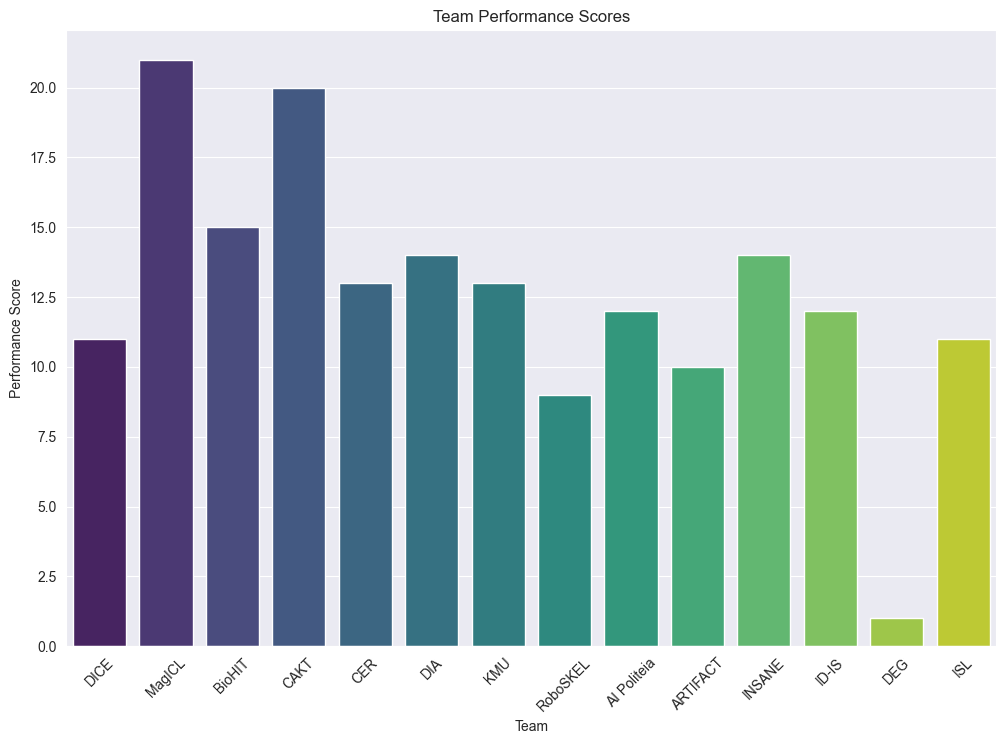

In [55]:
plot_individual_performance(df)

In [64]:
def plot_performance_distribution(df):
    """
    Plots a histogram of performance scores with a kernel density estimate (KDE).

    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data and performance scores.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Performance Score'], kde=True, color='blue')
    plt.title('Performance Score Distribution')
    plt.xlabel('Performance Score')
    plt.ylabel('Frequency')
    plt.show()

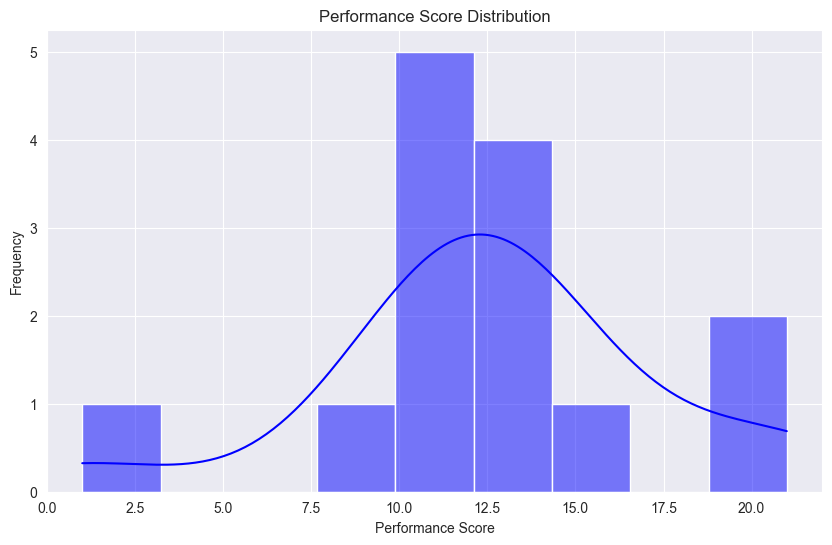

In [65]:
plot_performance_distribution(df)

In [7]:
industry_activity_file_path = 'data/industry_data.csv'
dfi = pd.read_csv(industry_activity_file_path, index_col=0).transpose()

In [8]:
for column in industry_columns:
    if column in dfi.columns:
        dfi[column] = dfi[column].map(involvement_mapping).fillna(0)

In [123]:
dfi

Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML
DICE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,2.0,2.0
MagICL,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0
BioHIT,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0
CAKT,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,3.0
CER,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0
DIA,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0
KMU,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0
RoboSKEL,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
AI Politeia,0.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARTIFACT,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfi)

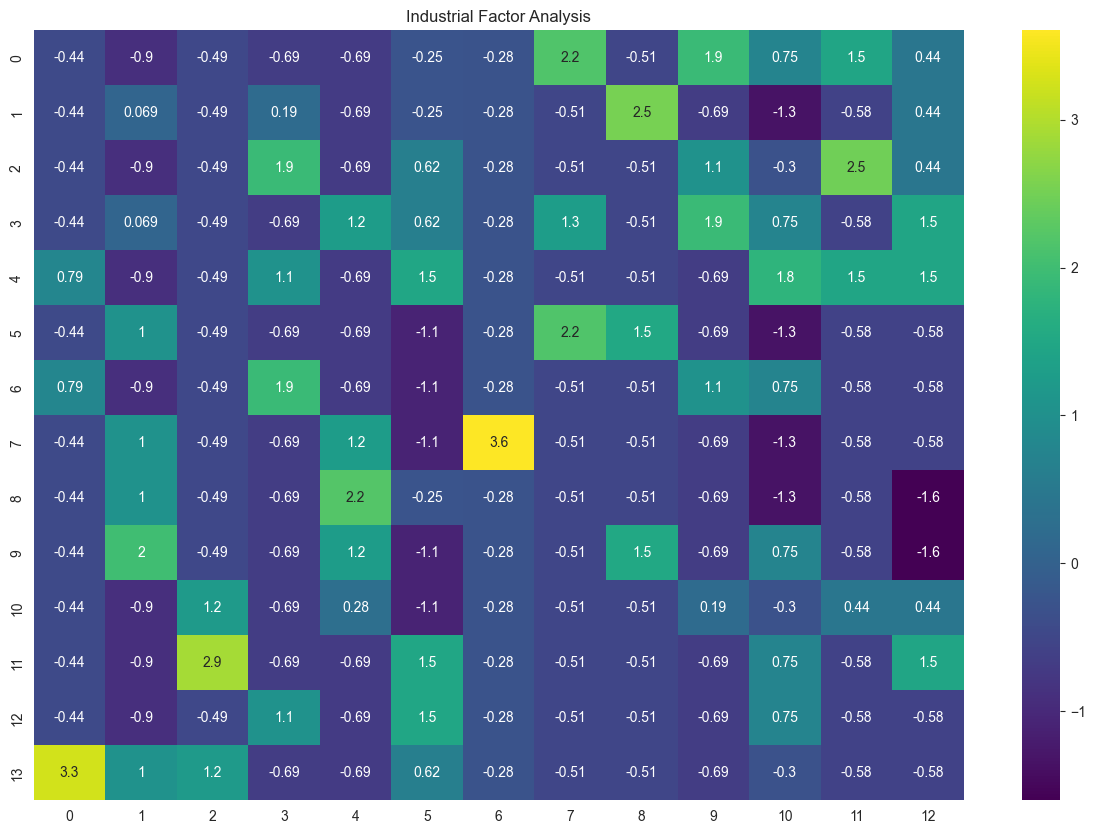

In [12]:
dfi_scaled = scaler.fit_transform(dfi)
plt.figure(figsize=(15, 10))
sns.heatmap(dfi_scaled, annot=True, cmap='viridis')
plt.title('Industrial Factor Analysis')
plt.show()

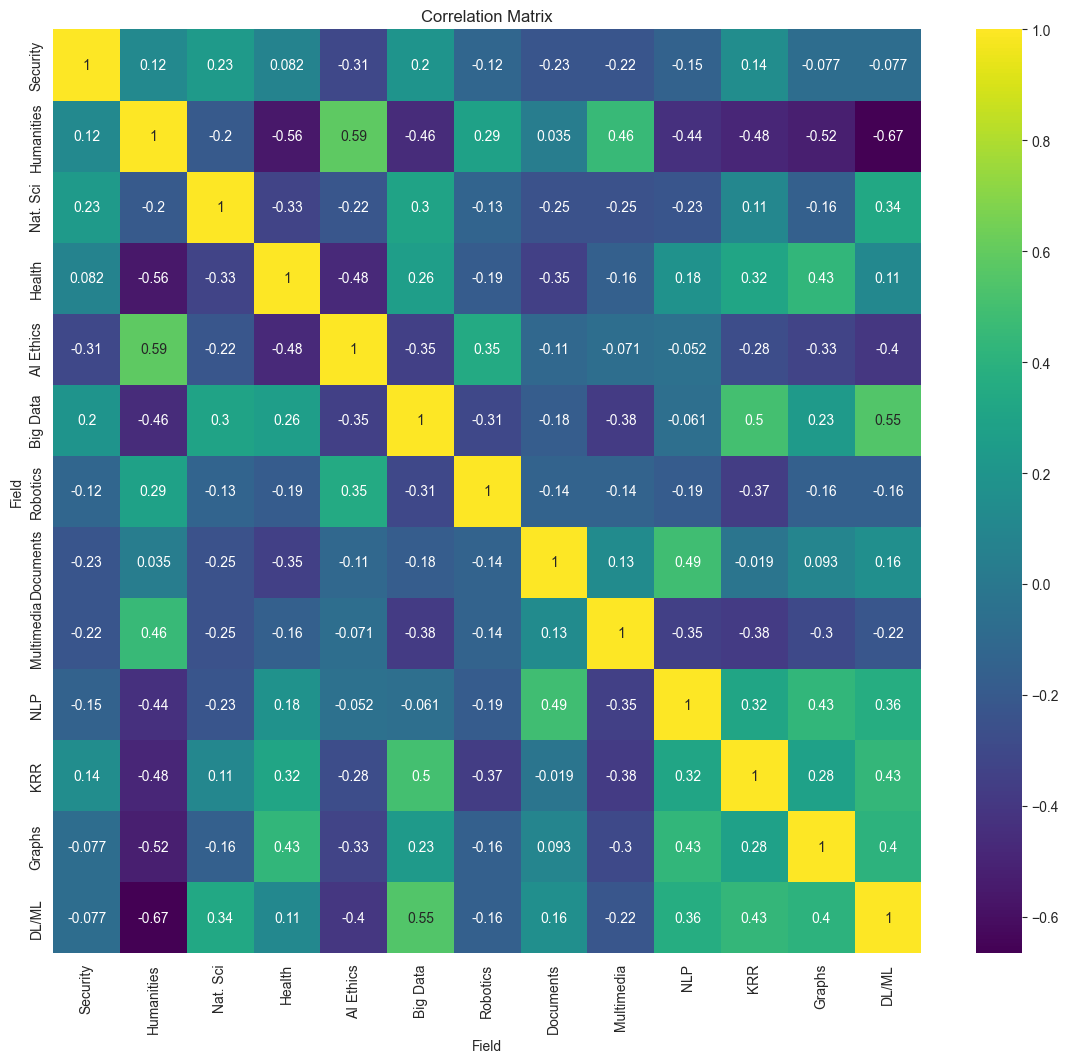

In [13]:
correlation_matrix = dfi.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

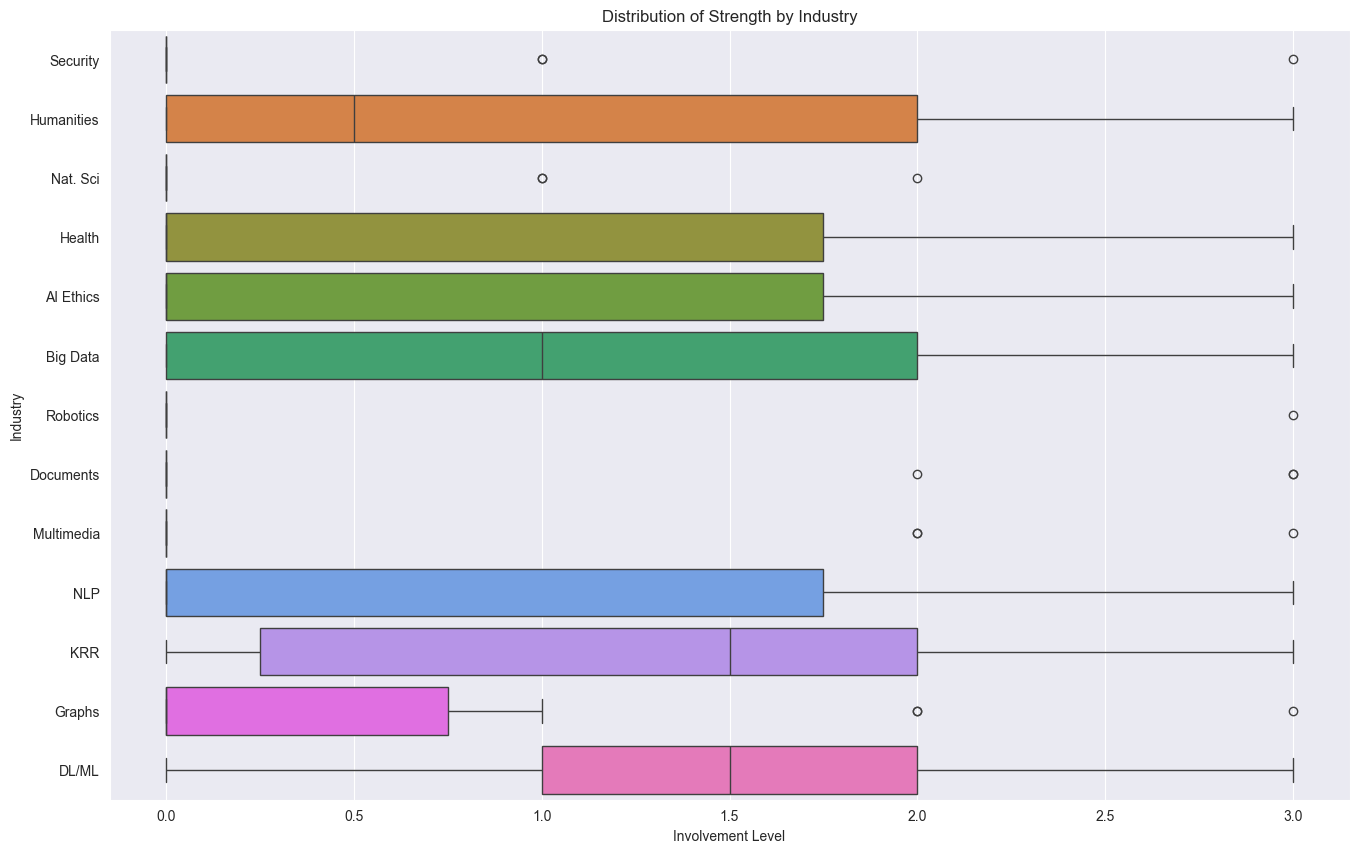

In [14]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=dfi, orient='h')
plt.title('Distribution of Strength by Industry')
plt.xlabel('Involvement Level')
plt.ylabel('Industry')
plt.show()

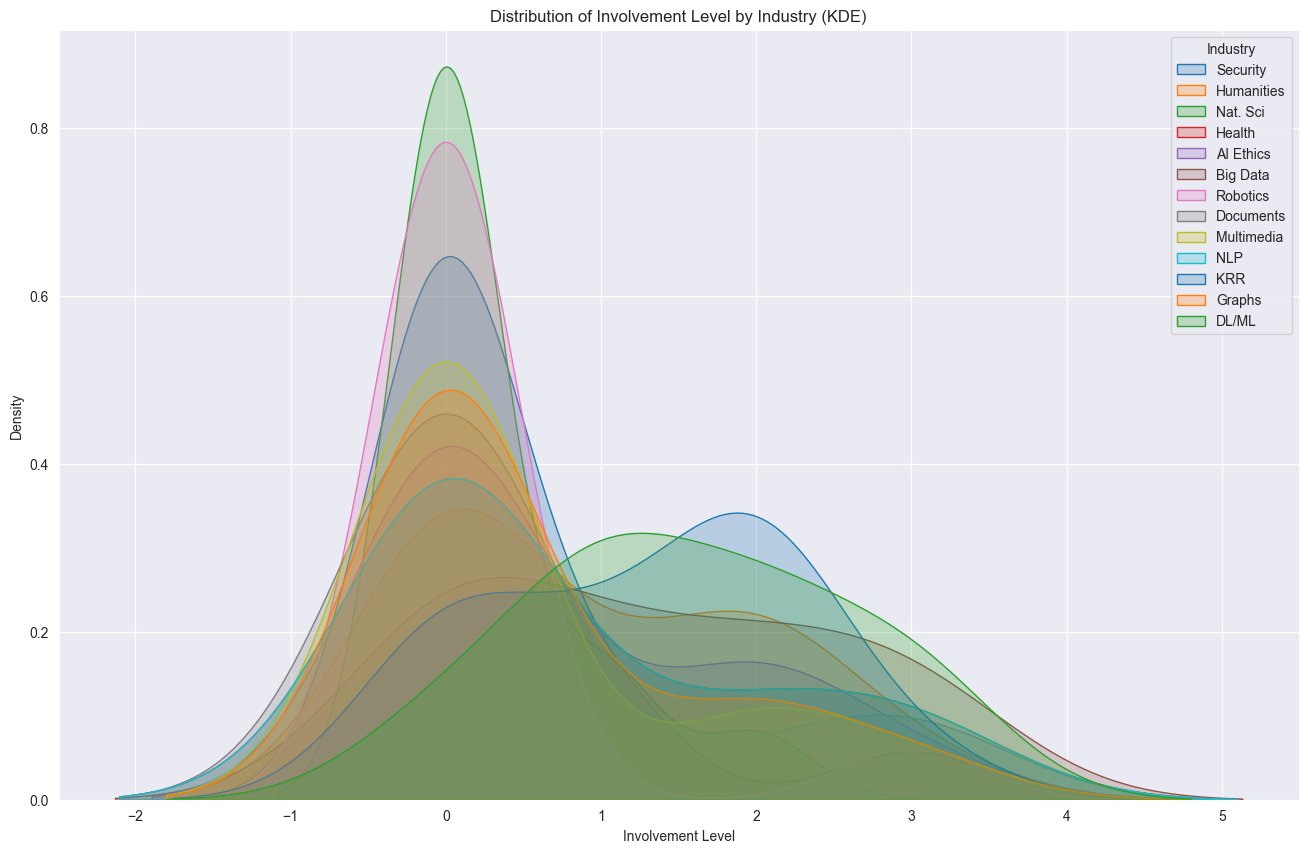

In [15]:
plt.figure(figsize=(16, 10))

for column in dfi.columns:
    sns.kdeplot(dfi[column], label=column, fill=True)

plt.title('Distribution of Involvement Level by Industry (KDE)')
plt.xlabel('Involvement Level')
plt.ylabel('Density')
plt.legend(title='Industry')
plt.show()

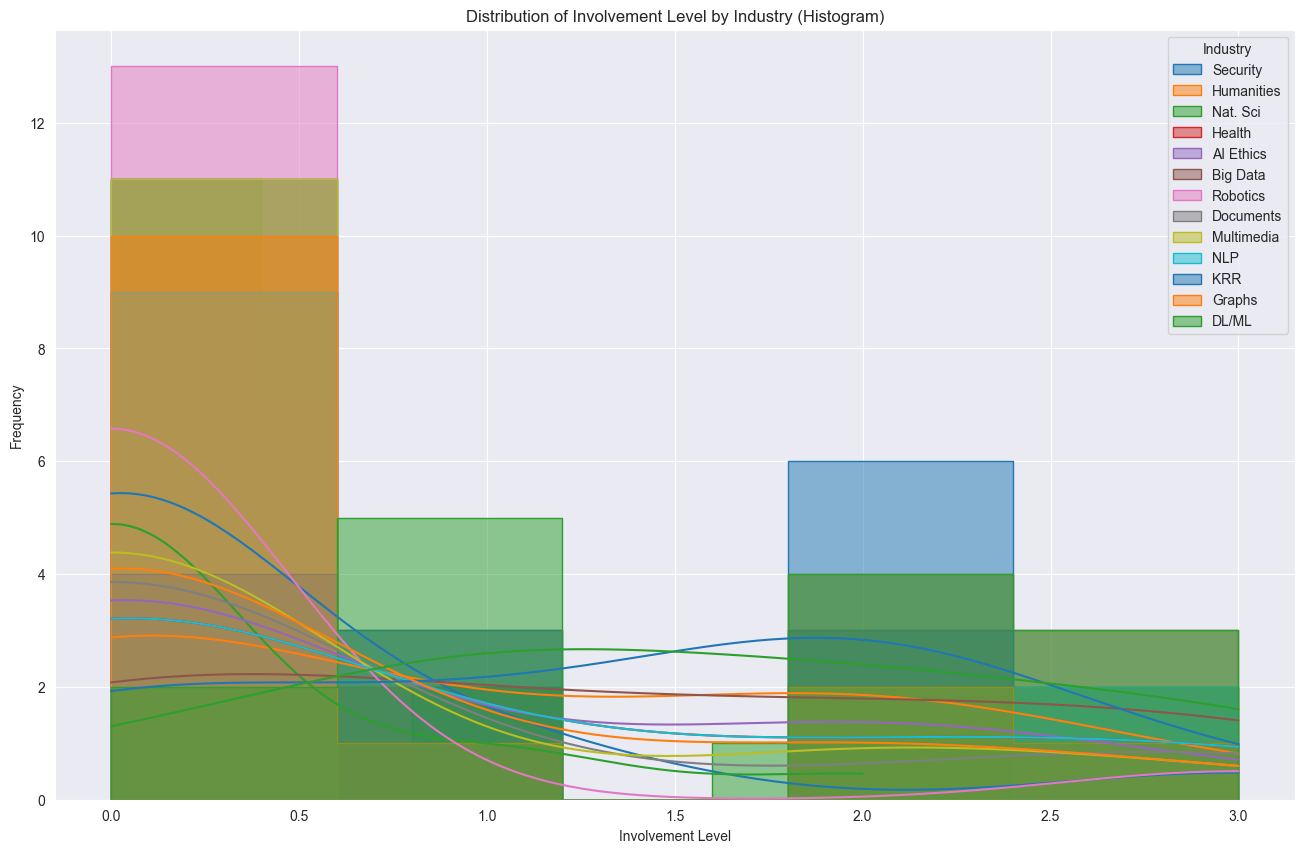

In [16]:
plt.figure(figsize=(16, 10))

for column in dfi.columns:
    sns.histplot(dfi[column], label=column, kde=True, element='step', fill=True)

plt.title('Distribution of Involvement Level by Industry (Histogram)')
plt.xlabel('Involvement Level')
plt.ylabel('Frequency')
plt.legend(title='Industry')
plt.show()

In [101]:
!pip install dash

In [17]:
scaler = StandardScaler()
dfi_scaled = scaler.fit_transform(dfi)
dfi_scaled = pd.DataFrame(dfi_scaled, columns=dfi.columns, index=dfi.index)

In [18]:
dfi_scaled

Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML
DICE,-0.440225,-0.899229,-0.485071,-0.686161,-0.693375,-0.246183,-0.277350,2.176627,-0.509175,1.933727,0.745356,1.458650,0.437595
MagICL,-0.440225,0.069171,-0.485071,0.187135,-0.693375,-0.246183,-0.277350,-0.512148,2.545875,-0.686161,-1.341641,-0.583460,0.437595
BioHIT,-0.440225,-0.899229,-0.485071,1.933727,-0.693375,0.615457,-0.277350,-0.512148,-0.509175,1.060431,-0.298142,2.479705,0.437595
CAKT,-0.440225,0.069171,-0.485071,-0.686161,1.248075,0.615457,-0.277350,1.280369,-0.509175,1.933727,0.745356,-0.583460,1.458650
CER,0.792406,-0.899229,-0.485071,1.060431,-0.693375,1.477098,-0.277350,-0.512148,-0.509175,-0.686161,1.788854,1.458650,1.458650
DIA,-0.440225,1.037572,-0.485071,-0.686161,-0.693375,-1.107823,-0.277350,2.176627,1.527525,-0.686161,-1.341641,-0.583460,-0.583460
KMU,0.792406,-0.899229,-0.485071,1.933727,-0.693375,-1.107823,-0.277350,-0.512148,-0.509175,1.060431,0.745356,-0.583460,-0.583460
RoboSKEL,-0.440225,1.037572,-0.485071,-0.686161,1.248075,-1.107823,3.605551,-0.512148,-0.509175,-0.686161,-1.341641,-0.583460,-0.583460
AI Politeia,-0.440225,1.037572,-0.485071,-0.686161,2.218801,-0.246183,-0.277350,-0.512148,-0.509175,-0.686161,-1.341641,-0.583460,-1.604515
ARTIFACT,-0.440225,2.005972,-0.485071,-0.686161,1.248075,-1.107823,-0.277350,-0.512148,1.527525,-0.686161,0.745356,-0.583460,-1.604515


In [23]:
import plotly.graph_objects as go

fig = go.Figure()

for column in dfi_scaled.columns:
    fig.add_trace(go.Box(
        y=dfi_scaled[column],
        name=column,
        boxpoints='all',
        jitter=0.5,
        whiskerwidth=0.2,
        fillcolor='rgba(93, 164, 214, 0.5)',
        marker=dict(color='rgba(255, 255, 255, 0.7)', size=2),
        line=dict(color='rgba(255, 255, 255, 1)', width=1)
    ))

fig.update_layout(
    title='Distribution of Strength by Industry (Scaled)',
    xaxis_title='Industry',
    yaxis_title='Involvement Level',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1,
        gridcolor='rgb(100, 100, 100)',
        gridwidth=1,
        zerolinecolor='rgb(100, 100, 100)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(30, 30, 30)',
    plot_bgcolor='rgb(30, 30, 30)',
    font=dict(color='rgb(200, 200, 200)'),
    title_font=dict(color='rgb(200, 200, 200)'),
    showlegend=False
)


In [31]:
import plotly.graph_objects as go

dimensions = [dict(range=[dfi_scaled[col].min(), dfi_scaled[col].max()],
                   label=col.replace('_', ' '),
                   values=dfi_scaled[col]) for col in dfi_scaled.columns]

fig_parallel_coordinates = go.Figure(data=go.Parcoords(
    line=dict(color='white'),  # You can customize this color
    dimensions=dimensions
))

fig_parallel_coordinates.update_layout(
    plot_bgcolor='rgb(30, 30, 30)',
    paper_bgcolor='rgb(30, 30, 30)',
    font=dict(color='rgb(200, 200, 200)')
)

fig_parallel_coordinates.show()


In [33]:
import plotly.express as px

dfi_melted = dfi.reset_index().melt(id_vars='index')
dfi_melted.columns = ['Metric', 'Industry', 'Value']

fig_histogram = px.histogram(dfi_melted, x='Value', y='Metric', color='Industry', marginal='rug',
                             hover_data=dfi_melted.columns, labels={'Value': 'Involvement Level', 'Metric': 'Metric', 'Industry': 'Industry'},
                             title='Distribution of Involvement Levels')

fig_histogram.update_layout(
    plot_bgcolor='rgb(30, 30, 30)',
    paper_bgcolor='rgb(30, 30, 30)',
    font_color='rgb(200, 200, 200)'
)


In [35]:
from scipy.stats import gaussian_kde

fig_kde = go.Figure()

for column in dfi.columns:
    kde = gaussian_kde(dfi[column])
    x = np.linspace(min(dfi[column]), max(dfi[column]), 1000)
    y = kde(x)
    fig_kde.add_trace(go.Scatter(x=x, y=y, mode='lines', fill='tozeroy', name=column))

fig_kde.update_layout(
    title='Distribution of Involvement Level by Industry (KDE)',
    xaxis_title='Involvement Level',
    yaxis_title='Density',
    paper_bgcolor='rgb(30, 30, 30)',
    plot_bgcolor='rgb(30, 30, 30)',
    font=dict(color='rgb(200, 200, 200)'),
    legend_title='Industry'
)

In [43]:
fig_hist_kde = go.Figure() #FIXME: Modify range to be greater than zero?

for column in dfi.columns:
    # Create histogram
    hist_data = dfi[column]
    fig_hist_kde.add_trace(go.Histogram(
        x=hist_data,
        name=column,
        opacity=0.6,
        histnorm='density'
    ))
    
    # Create KDE
    kde = gaussian_kde(hist_data)
    x = np.linspace(min(hist_data), max(hist_data), 1000)
    y = kde(x)
    fig_hist_kde.add_trace(go.Scatter(
        x=x, y=y, mode='lines', name=f'{column} KDE',
        line=dict(width=2)
    ))

fig_hist_kde.update_layout(
    title='Distribution of Involvement Level by Industry (Histogram with KDE)',
    xaxis_title='Involvement Level',
    yaxis_title='Density',
    barmode='overlay',
    paper_bgcolor='rgb(30, 30, 30)',
    plot_bgcolor='rgb(30, 30, 30)',
    font=dict(color='rgb(200, 200, 200)'),
    legend=dict(title='Industry')
)

In [64]:
import plotly.express as px

# Create the bar plot
fig_bar = px.bar(df, x='Team', y='Performance Score', color='Team', 
                 title='Team Performance Scores', labels={'Performance Score': 'Performance Score'})

# Update layout for dark theme
fig_bar.update_layout(
    plot_bgcolor='rgb(30, 30, 30)',
    paper_bgcolor='rgb(30, 30, 30)',
    font=dict(color='rgb(200, 200, 200)'),
    legend=dict(title='Team')
)


In [66]:
from dash import Dash, dcc, html, Input, Output

app = Dash(__name__)

app.layout = html.Div(style={'backgroundColor': 'rgb(30, 30, 30)', 'color': 'rgb(200, 200, 200)'}, children=[
    html.H1("Team Performance Scores", style={'textAlign': 'center', 'color': 'rgb(200, 200, 200)'}),
    dcc.Graph(id='bar-plot', figure=fig_bar),
    html.Label('Select a Team to Highlight:', style={'textAlign': 'center', 'color': 'rgb(200, 200, 200)'}),
    dcc.Slider(
        id='team-slider',
        min=0,
        max=len(df['Team']) - 1,
        value=0,
        marks={i: team for i, team in enumerate(df['Team'])},
        step=None
    ),
    html.Div(id='slider-output-container', style={'textAlign': 'center', 'color': 'rgb(200, 200, 200)'})
])

@app.callback(
    Output('bar-plot', 'figure'),
    Output('slider-output-container', 'children'),
    Input('team-slider', 'value')
)
def update_figure(selected_team_index):
    selected_team = df['Team'][selected_team_index]
    fig_bar = px.bar(df, x='Team', y='Performance Score', color='Team',
                     title='Team Performance Scores', labels={'Performance Score': 'Performance Score'})
    
    # Highlight the selected team
    fig_bar.update_traces(marker=dict(color=['rgba(93, 164, 214, 0.5)' if team != selected_team else 'rgba(255, 144, 14, 0.5)' for team in df['Team']]))
    
    # Update layout for dark theme
    fig_bar.update_layout(
        plot_bgcolor='rgb(30, 30, 30)',
        paper_bgcolor='rgb(30, 30, 30)',
        font=dict(color='rgb(200, 200, 200)'),
        legend=dict(title='Team')
    )
    
    return fig_bar, f"Highlighting: {selected_team}"

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter
